In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/remijul/dataset/master/dolphins.csv"
df = pd.read_csv(url)
df.head()

,variety,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
0,Tropicalis,Artic,39.1,18.7,181.0,3750.0,MALE
1,Tropicalis,Artic,39.5,17.4,186.0,3800.0,FEMALE
2,Tropicalis,Artic,40.3,18.0,195.0,3250.0,FEMALE
3,Tropicalis,Artic,NaN,NaN,NaN,NaN,NaN
4,Tropicalis,Artic,36.7,19.3,193.0,3450.0,FEMALE


# Réalisation de l'EDA (Exploratory Data Analysis) sur le jeu de données

In [2]:
# Nous réalisons un describe() pour visualiser les proportions
df.describe()

,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [3]:
# Nous observons les corrélations
df.corr()

,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g
dimension_1_mm,1.000000,-0.235053,0.656181,0.595110
dimension_2_mm,-0.235053,1.000000,-0.583851,-0.471916
dimension_3_mm,0.656181,-0.583851,1.000000,0.871202
mass_g,0.595110,-0.471916,0.871202,1.000000


In [4]:
# Nous observons le nombre de lignes et colonnes
df.shape

(344, 7)

In [8]:
# On visualise les valeurs prises par la colonne 'variety'
df['variety'].value_counts(normalize=True)

Tropicalis    0.441860
Peale         0.360465
Chinensis     0.197674
Name: variety, dtype: float64

In [157]:
# On visualise les valeurs prises par la colonne 'sex'
# on peut observer des 1, 2, et 0 car j'ai réaliser un 'encoding' avant dans la partie après
# puis je suis revenu dans cette partie pour faire cette cellule
df['sex'].value_counts(normalize=True)

1.0    0.508721
2.0    0.488372
0.0    0.002907
Name: sex, dtype: float64

In [158]:
# On visualise les valeurs prises par la colonne 'area'
# on peut observer des 1, 2, et 0 car j'ai réaliser un 'encoding' avant dans la partie après
# puis je suis revenu dans cette partie pour faire cette cellule
df['area'].value_counts(normalize=True)

1.0    0.488372
2.0    0.360465
0.0    0.151163
Name: area, dtype: float64

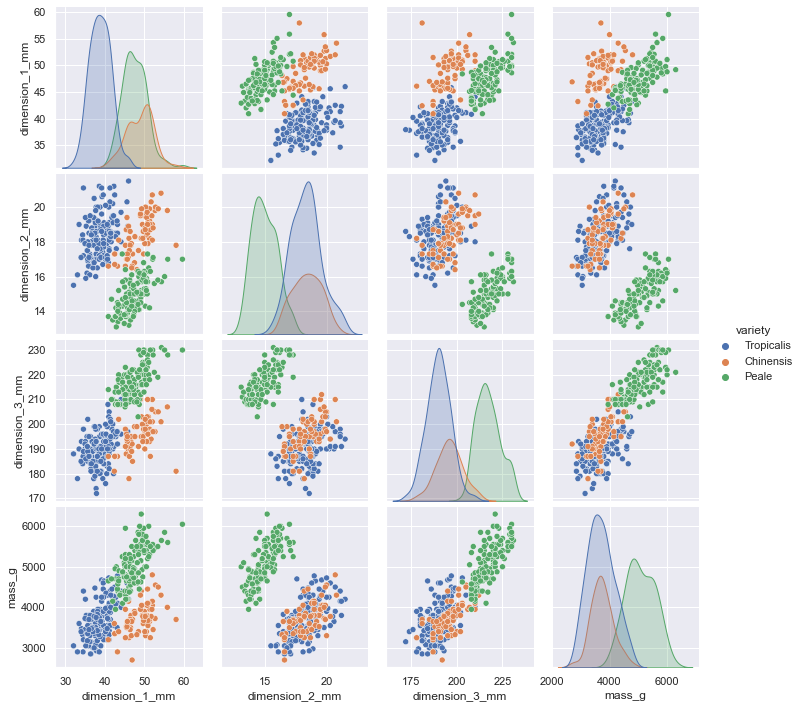

In [10]:
# On observe les corrélations avec 'seaborn'
import seaborn as sns

sns.set()
sns.pairplot(df, hue='variety', height=2.5);

In [ ]:
# Nous pouvons observer une forte corrélation entre les features 'mass_g' et 'dimension_3_mm'

<AxesSubplot:xlabel='sex'>

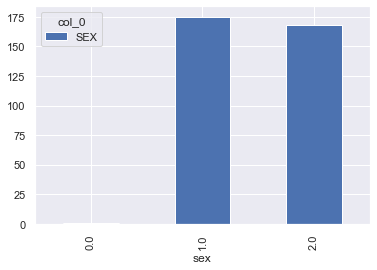

In [152]:
# On observe la proportion de 'Male' et de 'FEMALE'
# on peut observer des 1, 2, et 0 car j'ai réaliser un 'encoding' avant dans la partie après
# puis je suis revenu dans cette partie pour faire cette cellule
t = pd.crosstab(df.sex, "SEX")
t.plot.bar()

In [ ]:
# On peut noter que la proportion de "MALE" et de "FEMALE" est pratiquement la même

<AxesSubplot:xlabel='area'>

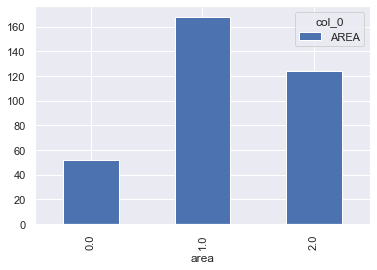

In [155]:
# On observe la proportion des valeurs dans la colonne 'area'
# on peut observer des 1, 2, et 0 car j'ai réaliser un 'encoding' avant dans la partie après
# puis je suis revenu dans cette partie pour faire cette cellule
t = pd.crosstab(df.area, "AREA")
t.plot.bar()

<AxesSubplot:xlabel='variety'>

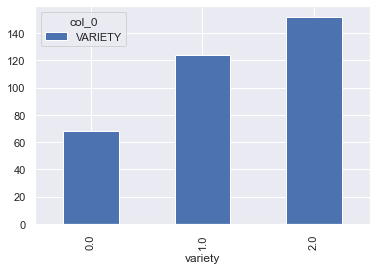

In [156]:
# On observe la proportion des valeurs dans la colonne 'variety'
# on peut observer des 1, 2, et 0 car j'ai réaliser un 'encoding' avant dans la partie après
# puis je suis revenu dans cette partie pour faire cette cellule
t = pd.crosstab(df.variety, "VARIETY")
t.plot.bar()

In [ ]:
# On peut noter que les valeurs prises par la colonne cible ne sont pas extrêmement disproportionnées
# et que dans la partie prédiction un Stratify suffira
# et que l'on aura pas besoin d'un SMOTE (Synthetic Minority Oversampling Technique)

<AxesSubplot:xlabel='area'>

<Figure size 1800x1080 with 0 Axes>

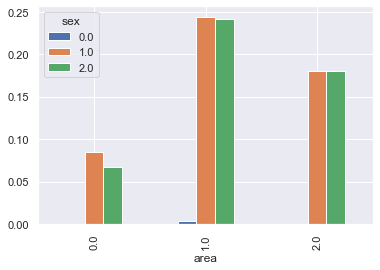

In [160]:
# On observe la proportion des valeurs dans la colonne 'area'
# on peut observer des 1, 2, et 0 car j'ai réaliser un 'encoding' avant dans la partie après
# puis je suis revenu dans cette partie pour faire cette cellule
t = pd.crosstab( df.area, df.sex, normalize=True)
plt.gcf().set_size_inches(25, 15)
t.plot.bar()

<AxesSubplot:xlabel='variety'>

<Figure size 1800x1080 with 0 Axes>

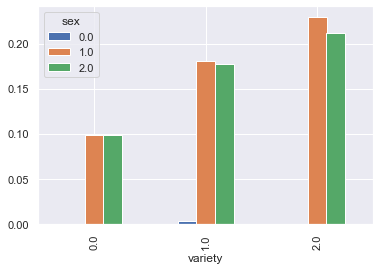

In [161]:
# On observe la proportion des valeurs dans la colonne 'variety'
# on peut observer des 1, 2, et 0 car j'ai réaliser un 'encoding' avant dans la partie après
# puis je suis revenu dans cette partie pour faire cette cellule
t = pd.crosstab( df.variety, df.sex, normalize=True)
plt.gcf().set_size_inches(25, 15)
t.plot.bar()

In [ ]:
# On peut observer que la proportion de 'MALE' et de 'FEMALE' est gardée
# quelque soit la 'variety' et l'area'

# Réalisation du preprocessing des données

In [16]:
# Nous affichons ici les valeurs manquantes de chaque colonne
print(df.isnull().sum())


variety            0
area               0
dimension_1_mm     2
dimension_2_mm     2
dimension_3_mm     2
mass_g             2
sex               10
dtype: int64


In [19]:
# Nous remplaçons les valeurs manquantes de la colonne 'dimension_1_mm' en utilisant la médiane de celle ci
median = df['dimension_1_mm'].median()
df['dimension_1_mm'].fillna(median, inplace=True)

In [18]:
# Nous affichons ici les valeurs manquantes de chaque colonne 
print(df.isnull().sum())

variety            0
area               0
dimension_1_mm     0
dimension_2_mm     2
dimension_3_mm     2
mass_g             2
sex               10
dtype: int64


In [20]:
# Nous remplaçons les valeurs manquantes de la colonne 'dimension_2_mm' en utilisant la médiane de celle ci
median = df['dimension_2_mm'].median()
df['dimension_2_mm'].fillna(median, inplace=True)

In [21]:
# Nous affichons ici les valeurs manquantes de chaque colonne 
print(df.isnull().sum())

variety            0
area               0
dimension_1_mm     0
dimension_2_mm     0
dimension_3_mm     2
mass_g             2
sex               10
dtype: int64


In [22]:
# Nous remplaçons les valeurs manquantes de la colonne 'dimension_3_mm' en utilisant la médiane de celle ci 
median = df['dimension_3_mm'].median()
df['dimension_3_mm'].fillna(median, inplace=True)

In [23]:
# Nous affichons ici les valeurs manquantes de chaque colonne  
print(df.isnull().sum())

variety            0
area               0
dimension_1_mm     0
dimension_2_mm     0
dimension_3_mm     0
mass_g             2
sex               10
dtype: int64


In [24]:
# Nous remplaçons les valeurs manquantes de la colonne 'mass_g' en utilisant la médiane de celle ci 
median = df['mass_g'].median()
df['mass_g'].fillna(median, inplace=True)

In [25]:
# Nous affichons ici les valeurs manquantes de chaque colonne 
print(df.isnull().sum())

variety            0
area               0
dimension_1_mm     0
dimension_2_mm     0
dimension_3_mm     0
mass_g             0
sex               10
dtype: int64


In [29]:
# Nous remplaçons les valeurs manquantes de la colonne 'sex' arbitrairement par 'FEMALE' 
# sachant que ces 10 valeurs manquantes représente 3% du Data
# ce qui nous permet de faire cet arbitrage
df['sex'].fillna('FEMALE', inplace=True)

In [30]:
# Nous affichons ici les valeurs manquantes de chaque colonne 
print(df.isnull().sum())

variety           0
area              0
dimension_1_mm    0
dimension_2_mm    0
dimension_3_mm    0
mass_g            0
sex               0
dtype: int64


In [153]:
# On importe la library pour la partie 'encoding'
from sklearn.preprocessing import OrdinalEncoder

In [79]:
# Nous définissons l'ordinal encoding
encoder = OrdinalEncoder()
# Nous effectuons l'Encodage sur la colonne 'area'
df['area'] = encoder.fit_transform(df[['area']])
print(df['area'])

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
339    1.0
340    1.0
341    1.0
342    1.0
343    1.0
Name: area, Length: 344, dtype: float64


In [116]:
# Nous effectuons l'Encodage sur la colonne 'variety'
df['variety'] = encoder.fit_transform(df[['variety']])
print(df['variety'])

0      2.0
1      2.0
2      2.0
3      2.0
4      2.0
      ... 
339    1.0
340    1.0
341    1.0
342    1.0
343    1.0
Name: variety, Length: 344, dtype: float64


In [117]:
# # Nous effectuons l'Encodage sur la colonne 'sex'
df['sex'] = encoder.fit_transform(df[['sex']])
print(df['sex'])

0      2.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
339    1.0
340    1.0
341    2.0
342    1.0
343    2.0
Name: sex, Length: 344, dtype: float64


In [118]:
# Nous Définissons la colonne cible Y avec la colonne 'variety'
# et nous mettons le reste des colonnes dans X
# ce qui nous permettra de réaliser par la suite le Split
X = df.drop(['variety'], axis=1)
Y = df['variety']

# Entrainement du modèle d'apprentissage supervisé¶

In [154]:
# On importe les library pour la partie 'Entrainement du modèle d'apprentissage supervisé'
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [119]:
# Nous effectuons le Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [120]:
# Nous définissons les différentes valeurs possibles des paramètres pour le GridSearchCV
# pour la recherche de ces meilleurs valeurs pour un meilleur scoring de accuracy
# pour le moment, j'ai juste pris en compte les paramètres 'model__criterion' et 'model__n_estimators'
# pour voir quel score j'obtenais dans un premier temps
param_grid = {
                            'model__criterion': ["gini", "entropy"],
                            'model__n_estimators': [90, 100, 115, 130],
                            #'model__min_samples_leaf': [1, 2, 5, 10, 15],
                            #'model__min_samples_split': [2, 5, 10, 15, 20],
                            #'model__max_features': ['auto', 'sqrt', 'log2'],
                            }

In [147]:
# Nous définissons un  "ColumnTransformer()" pour réaliser un scaling 'RobusScaler()' sur 
# les colonnes 'sex', 'area' et 'variety'
transformer_num = ColumnTransformer(transformers=[
                                                        ('Scaling', RobustScaler(), ['sex', 'area', 'variety'])
                                                        ]
                                            )

In [122]:
# Nous définissons le Pipeline.
# Dans un premier temps, pour voir quel score de accuracy je peux obtenir
# je ne réalise pas le scaling
# je ne réalise pas le 'SMOTE()' pour créer des nouvelles valeurs distinctes pour "re-proportionner" 
# sachant que la proportion de variety est correct, sans qu'il y en est une en dessous de 20%
# je ne réalise pas un 'RandomUnderSampler()' pour réduire le nombre pour une proportion à 50% - 50%
# j'utilise dans un premier temps le model 'RandomForestClassifier()'
pipe = Pipeline(steps=[
                               #('transformer', transformer_num),
                               #('smote', SMOTE(sampling_strategy=0.25)),
                               #('under',RandomUnderSampler(sampling_strategy=0.5)),
                               ('model', RandomForestClassifier())
                               ]
                        )

In [123]:
# On applique le GridSearchCV pour chercher la meilleur accuracy suivant le pipeline et les différentes valeurs des paramètres
# avec un 'StratifiedKFold' pour garder les mêmes proportions lorsqu'il découpera les 5 parties
grid = GridSearchCV(pipe, param_grid, scoring = 'accuracy', cv=StratifiedKFold(n_splits = 5, shuffle = True, random_state = 123))

In [124]:
# On forme le 'grid' avec le jeu de train
grid.fit(X_train, Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('model', RandomForestClassifier())]),
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__n_estimators': [90, 100, 115, 130]},
             scoring='accuracy')

In [125]:
# On réalise la prédiction avec le X_train
pred_on_train_data = grid.predict(X_train)

In [126]:
# On réalise la prédiction avec le X_test
pred_on_test_data = grid.predict(X_test)

# Evaluation du modèle

In [146]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [128]:
# On visualise la matrice de confusion suivant le jeu de train et la prédiction de X_train
cf_matrix_training = confusion_matrix(Y_train, pred_on_train_data)
cf_matrix_training

array([[ 54,   0,   0],
       [  0,  99,   0],
       [  0,   0, 122]], dtype=int64)

In [129]:
# Dans un premier temps avec les premiers 'paramètres', on visualise le score de prédiction
score_prediction_training = accuracy_score(Y_train, pred_on_train_data)
print("Score de prédiction du Data Train: ",score_prediction_training*100, "%")

Score de prédiction du Data Train:  100.0 %


In [130]:
# On visualise la matrice de confusion suivant le jeu de test et la prédiction de X_test
# On peut observer que le modèle entraîné a commis une erreur
# Il a pris un 'Chinensis' pour un vrai 'Tropicalis'
cf_matrix_testing = confusion_matrix(Y_test, pred_on_test_data)
cf_matrix_testing

array([[13,  0,  1],
       [ 0, 25,  0],
       [ 0,  0, 30]], dtype=int64)

In [131]:
# Dans un premier temps avec les premiers 'paramètres', on visualise le score de prédiction
score_prediction_testing = accuracy_score(Y_test, pred_on_test_data)
print("Score de prédiction du Data Test: ",score_prediction_testing*100, "%")

Score de prédiction du Data Test:  98.55072463768117 %


In [137]:
# On visualise le score du recall
score_recall_testing = recall_score(Y_test, pred_on_test_data, average='micro')
print("Score du Recall du Data Test: ",score_recall_testing*100, "%")

Score du Recall du Data Test:  98.55072463768117 %


In [140]:
# On visualise le score de précision
score_precision_testing = precision_score(Y_test, pred_on_test_data, average='micro')
print("Score de Précision du Data Test: ",score_precision_testing*100, "%")

Score de Précision du Data Test:  98.55072463768117 %


In [143]:
# On visualise le score du f1 score
score_f1_testing = f1_score(Y_test, pred_on_test_data, average='micro')
print("Score du F1 Score du Data Test: ",score_f1_testing*100, "%")

Score du F1 Score du Data Test:  98.55072463768117 %


# Conclusion

In [162]:
# Par manque de temps, je n'ai pu comparer les résultats du modèle 'RandomForestClassifier()'
# par rapport à ceux des autres modèles de prédictions possibles

# Aussi,
# Dans un premier temps, pour voir quels scores je pouvais obtenir,
# je n'ai pas utiliser tous les paramètres (le RobustScaler, le SMOTE et le RandomUnderSampler)
# et j'ai pu obtenir un score de prédiction de plus de 98,5 % 
# c'est pour cela par la suite que je n'ai pas souhaiter les utiliser

# Aussi,
# Je sais qu'avec un peu plus de temps,
# J'aurais essayer d'améliorer la visualisation de la confusion matrix
# qui me semble ici pas présentable